In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('height-weight.csv')
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [3]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


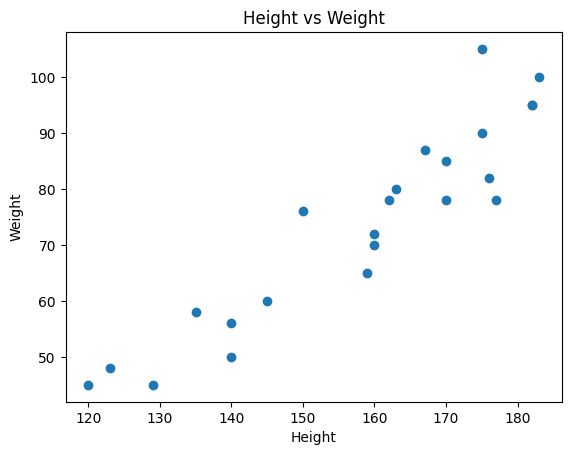

In [4]:
## scatter plot
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()

<Axes: >

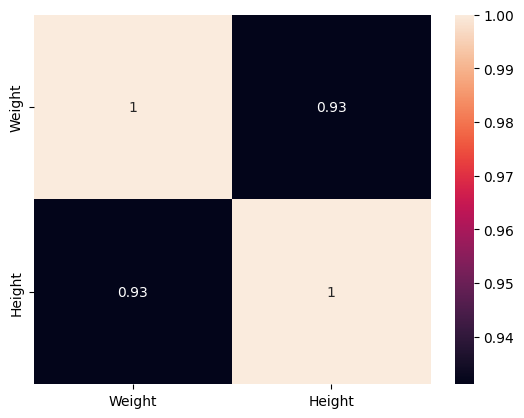

In [5]:
sns.heatmap(df.corr(),annot=True)

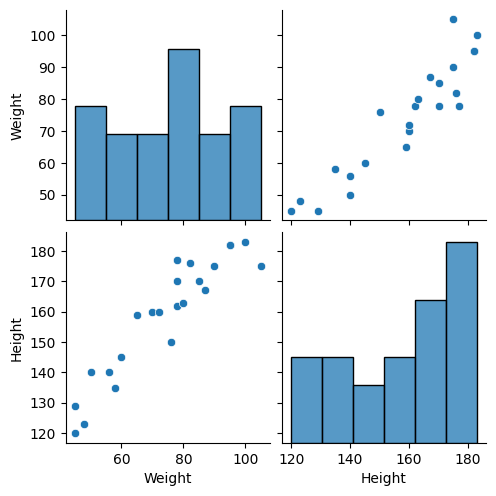

In [6]:
sns.pairplot(df)

In [7]:
# divide into dependent and independent features
X,Y=df[['Weight']],df['Height']
# X should always be more than 1 dimension
# Y can be single dimension

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [9]:
# standardisation

# mean=np.mean(x_train)
# std=np.std(x_train)

# x_train=(x_train-mean)/std
# x_test=(x_test-mean)/std
# x_train
# using sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [10]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [11]:
linear.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
print("Slope :",linear.coef_)
print("Intercept :",linear.intercept_)

Slope : [17.2982057]
Intercept : 156.47058823529412


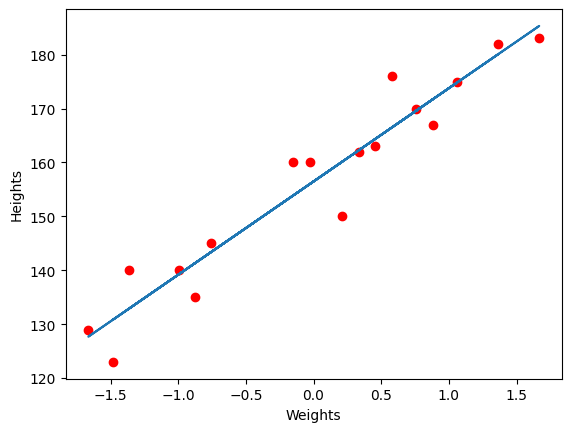

In [13]:
#plot best fit line according to training data
plt.scatter(x_train,y_train,color='Red')
plt.plot(x_train,linear.predict(x_train))
plt.xlabel('Weights')
plt.ylabel('Heights')
plt.show()

In [14]:
y_hat=linear.predict(x_test)

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_hat)
mae=mean_absolute_error(y_test,y_hat)
rmse=mse**0.5

In [16]:
print("MSE:",mse)
print("RMSE:",rmse)
print("MAE:",mae)

MSE: 114.84069295228699
RMSE: 10.716374991212605
MAE: 9.66512588679501


In [17]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_hat)
print("R square:",score)

R square: 0.7360826717981276


In [18]:
# OLS technique
from statsmodels.api import OLS
model=OLS(y_train,x_train).fit()

In [19]:
y_pred=model.predict(x_test)
y_pred

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [20]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 07 Oct 2025   Prob (F-statistic):                       0.664
Time:                        14:27:42   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [23]:
linear.predict(scaler.transform([[90]]))

array([174.84009753])